In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = "/content/drive/MyDrive/Project_data.xlsx"

In [4]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [6]:
df = pd.read_excel(data)

df.head()

,Sl. No,Name_of_Incident,Date,Month,Year,Country,Type_of_Event,Place_Name,Impact,Affected_Population,Important_Person/Group_Responsible,Outcome,Total_Population,Population_Affected,Text_description
0,1,Indus Valley Civilization Flourishes,Unknown,Unknown,2600 BC,India,Civilization,Indus Valley,Development of one of the world's earliest urb...,Local inhabitants,Indus Valley people,Positive,5000000,4500000,Development of one of the world's earliest urb...
1,2,Battle of the Ten Kings,Unknown,Unknown,1400 BC,India,Battle,Punjab,Rigvedic tribes consolidated their control ove...,Rigvedic tribes,Sudas,Positive,100000,10000,A significant battle where Rigvedic tribes con...
2,6,Establishment of the Delhi Sultanate,Unknown,Unknown,1206,India,Political,Delhi,Muslim rule established in parts of India,People of Delhi and surrounding regions,QutbUnknownudUnknowndin Aibak,Mixed,1000000,100000,The beginning of Muslim rule in parts of India...
3,7,Battle of Panipat,21,April,1526,India,Battle,Panipat,Foundation of the Mughal Empire in India,Northern Indian kingdoms,Babur,Mixed,2000000,250000,A foundational battle for the Mughal Empire in...
4,8,Establishment of British Raj,1,May,1858,India,Colonial,Whole India,Start of direct British governance in India,Indian subcontinent,British East India Company/Empire,Negative,200000000,25000000,Marks the start of direct British governance o...


In [7]:
df.columns

Index(['Sl. No', 'Name_of_Incident', 'Date', 'Month', 'Year', 'Country',
       'Type_of_Event', 'Place_Name', 'Impact', 'Affected_Population',
       'Important_Person/Group_Responsible', 'Outcome', 'Total_Population',
       'Population_Affected', 'Text_description'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Sl. No                              1096 non-null   int64 
 1   Name_of_Incident                    1096 non-null   object
 2   Date                                1069 non-null   object
 3   Month                               1096 non-null   object
 4   Year                                1096 non-null   object
 5   Country                             1096 non-null   object
 6   Type_of_Event                       1096 non-null   object
 7   Place_Name                          1096 non-null   object
 8   Impact                              1096 non-null   object
 9   Affected_Population                 1096 non-null   object
 10  Important_Person/Group_Responsible  1096 non-null   object
 11  Outcome                             1096 non-null   obje

In [9]:
nan_counts = df.isna().sum()
print(nan_counts)

Sl. No                                 0
Name_of_Incident                       0
Date                                  27
Month                                  0
Year                                   0
Country                                0
Type_of_Event                          0
Place_Name                             0
Impact                                 0
Affected_Population                    0
Important_Person/Group_Responsible     0
Outcome                                0
Total_Population                       0
Population_Affected                    0
Text_description                       0
dtype: int64


In [27]:
df.describe()

,Sl. No,Outcome,Total_Population,Population_Affected,Impact Score,Sentiment
count,1096.000000,1096.000000,1.095000e+03,1.069000e+03,1068.000000,1096.000000
mean,581.784672,0.511861,1.386781e+08,3.332188e+07,50.508533,-0.040340
std,330.792389,0.500087,3.135124e+08,1.192008e+08,223.386921,0.474769
min,1.000000,0.000000,3.500000e+02,4.000000e+00,0.000002,-0.933700
25%,301.500000,0.000000,5.000000e+06,1.980000e+05,1.542589,-0.445000
50%,585.500000,1.000000,2.500000e+07,3.000000e+06,26.564283,0.000000
75%,865.250000,1.000000,8.534174e+07,1.932200e+07,80.952381,0.361200
max,1151.000000,1.000000,2.692566e+09,1.400000e+09,7000.000000,0.900100


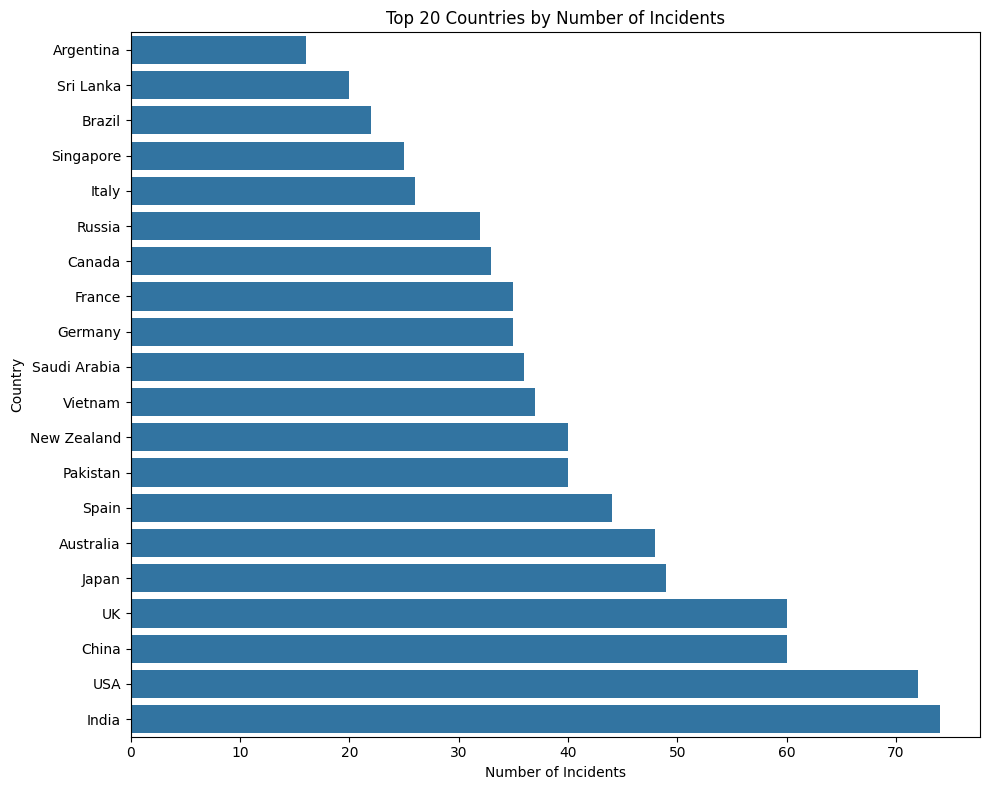

In [10]:
country_counts = df['Country'].value_counts()

# Sorting the values to ensure the bar chart is ordered
country_counts_sorted = country_counts.sort_values(ascending=True)

# The number of countries you want to display
top_n = 20

# Select only the top_n values to plot
top_countries = country_counts_sorted[-top_n:]

# Create the horizontal bar plot
plt.figure(figsize=(10, 8))  # Adjust the size to fit your screen and the number of categories
sns.barplot(x=top_countries.values, y=top_countries.index)

# Set the labels and title
plt.xlabel('Number of Incidents')
plt.ylabel('Country')
plt.title('Top {} Countries by Number of Incidents'.format(top_n))

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

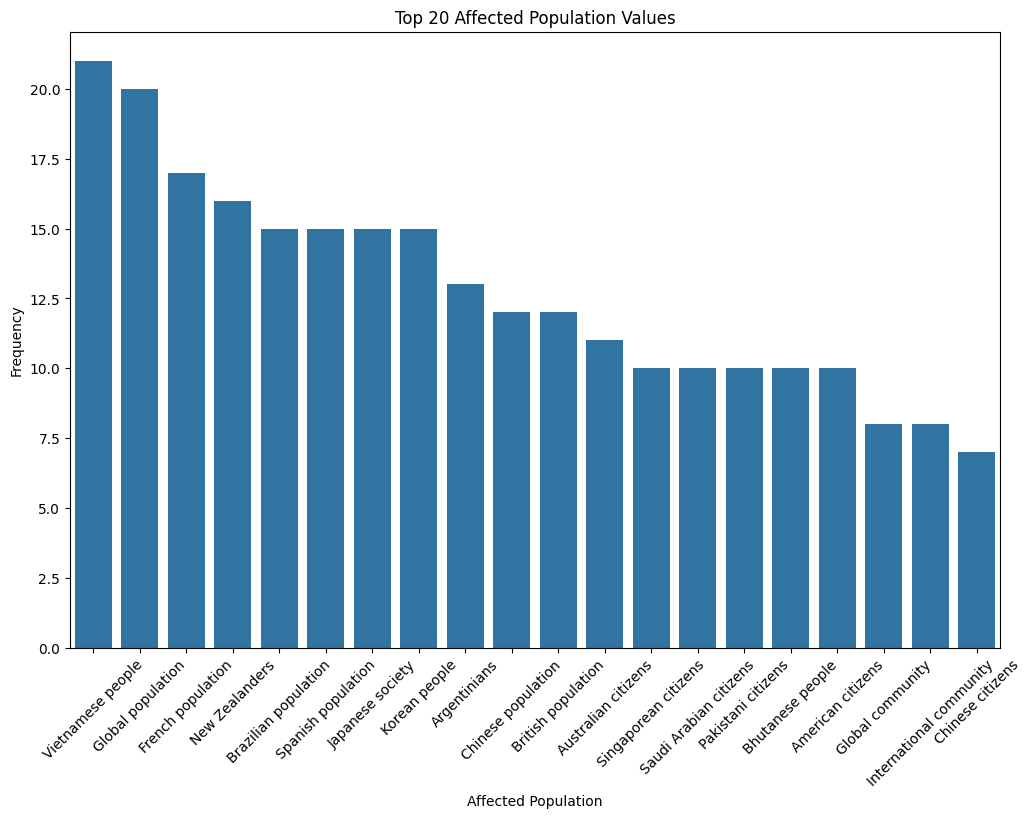

In [11]:

top20 = df['Affected_Population'].value_counts().nlargest(20)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top20.index, y=top20.values, order=top20.index)

# Set plot title and labels
plt.title('Top 20 Affected Population Values')
plt.xlabel('Affected Population')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

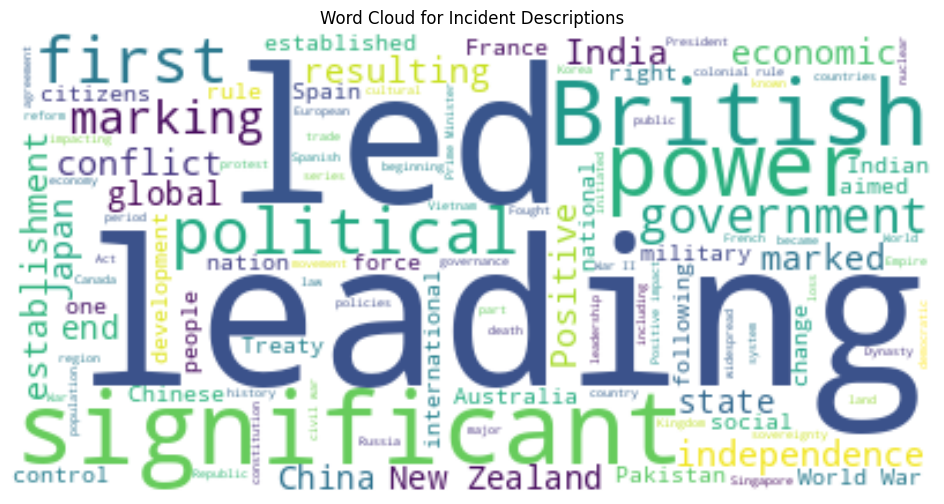

In [12]:
from wordcloud import WordCloud

# Concatenate all text descriptions into one text
text = ' '.join(description for description in df['Text_description'].astype(str))

# Generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Incident Descriptions')
plt.show()


#"significant" and "political": These words are very prominent, suggesting that many incidents described in the dataset have significant political aspects or repercussions.
#"economic" and "conflict": These words also stand out, which could imply that the incidents often relate to economic issues or conflicts.
#"government" and "power": These frequently appearing words may point to discussions or descriptions involving governmental power or shifts in power.
#"leadership": The word "leadership" in large letters indicates it's a common theme, possibly reflecting incidents that involve changes in leadership or are defining for a leader.
#Names of countries: The presence of "China," "Japan," "India," "Australia," and "New Zealand" indicates that many incidents are related to or occurred within these nations.
#Other relevant words: Words like "global," "social," "cultural," and "international" suggest the wide-ranging nature of the incidents, possibly with global implications or relating to social and cultural aspects.
#Word clouds can be useful for quickly identifying prominent themes and topics within large text datasets.

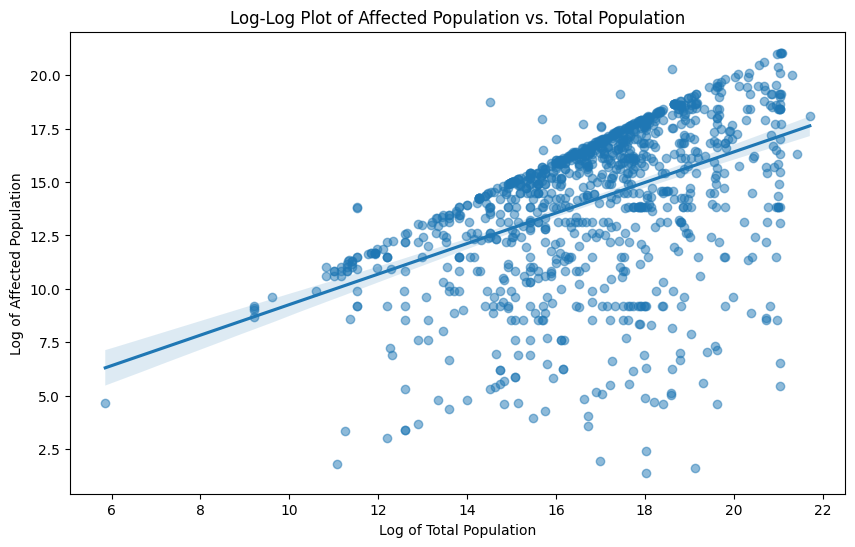

In [13]:
df['Population_Affected'] = pd.to_numeric(df['Population_Affected'], errors='coerce')
df['Total_Population'] = pd.to_numeric(df['Total_Population'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.regplot(x=np.log(df['Total_Population']), y=np.log(df['Population_Affected']), scatter_kws={'alpha': 0.5})


# Set the title and labels
plt.title('Log-Log Plot of Affected Population vs. Total Population')
plt.xlabel('Log of Total Population')
plt.ylabel('Log of Affected Population')

# Show the plot
plt.show()

In [14]:
df.columns

Index(['Sl. No', 'Name_of_Incident', 'Date', 'Month', 'Year', 'Country',
       'Type_of_Event', 'Place_Name', 'Impact', 'Affected_Population',
       'Important_Person/Group_Responsible', 'Outcome', 'Total_Population',
       'Population_Affected', 'Text_description'],
      dtype='object')

In [15]:

# Calculating the impact score
df['Impact Score'] = (df['Population_Affected'] / df['Total_Population']) * 100

# Sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()

df['Sentiment'] = df['Text_description'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Generating a dummy 'Outcome' for classification
df['Outcome'] = np.random.choice([0, 1], size=len(df))

# Prepare features and target for classification
X = df[['Impact Score', 'Sentiment']]
y = df['Outcome']


In [16]:
# Check for NaN values after calculating 'Impact Score'
df['Impact Score'] = (df['Population_Affected'] / df['Total_Population']) * 100
if df['Impact Score'].isnull().any():
    print('NaN values found in Impact Score after calculation')

NaN values found in Impact Score after calculation


In [17]:
# Calculating the impact score
df['Impact Score'] = (df['Population_Affected'] / df['Total_Population']) * 100

# Sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()

df['Sentiment'] = df['Text_description'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Generating a dummy 'Outcome' for classification
df['Outcome'] = np.random.choice([0, 1], size=len(df))

# Prepare features and target for classification
X = df[['Impact Score', 'Sentiment']]
y = df['Outcome']

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Impute the missing values in 'X'
X_imputed = imputer.fit_transform(X)

# Now we can safely split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Dictionary of classification models
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}


# Train and evaluate each model
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")

# Setting up the parameter grid to tune the Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Evaluate on the test set using the best model from the grid search
best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test)
tuned_accuracy = accuracy_score(y_test, predictions)
print(f"Random Forest tuned accuracy: {tuned_accuracy}")

Logistic Regression Accuracy: 0.48328267477203646
SVM Accuracy: 0.48328267477203646
Decision Tree Accuracy: 0.48936170212765956
K-Nearest Neighbors Accuracy: 0.5075987841945289
Random Forest Accuracy: 0.49544072948328266
Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.4720128676470588
Random Forest tuned accuracy: 0.49544072948328266


Logistic Regression - Accuracy: 0.48328267477203646, Precision: 0.48328267477203646, Recall: 1.0, F1 Score: 0.6516393442622951
SVM - Accuracy: 0.48328267477203646, Precision: 0.48328267477203646, Recall: 1.0, F1 Score: 0.6516393442622951
Decision Tree - Accuracy: 0.49544072948328266, Precision: 0.4774193548387097, Recall: 0.46540880503144655, F1 Score: 0.4713375796178344
K-Nearest Neighbors - Accuracy: 0.5075987841945289, Precision: 0.49214659685863876, Recall: 0.5911949685534591, F1 Score: 0.537142857142857
Random Forest - Accuracy: 0.49544072948328266, Precision: 0.47904191616766467, Recall: 0.5031446540880503, F1 Score: 0.49079754601226994


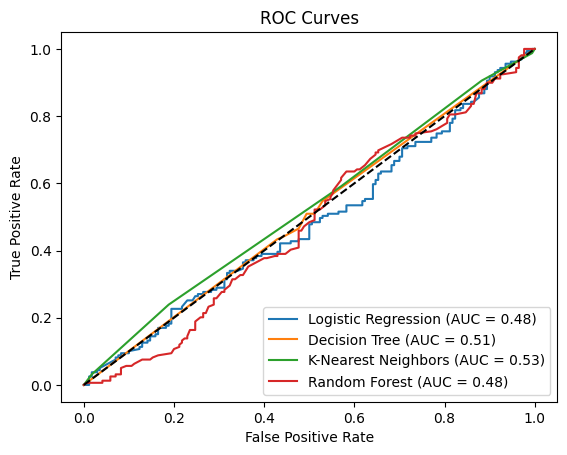

Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.4720128676470588
Random Forest - Tuned Accuracy: 0.49544072948328266, Precision: 0.47878787878787876, Recall: 0.4968553459119497, F1: 0.4876543209876543, ROC AUC: 0.4760266370699222


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Dictionary to store all the results for later use
results = {}

# Train, evaluate each model, and calculate additional metrics
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    # Calculating basic accuracy
    accuracy = accuracy_score(y_test, predictions)

    # Calculate precision, recall, and F1 Score
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Store metrics
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Check if the classifier supports predict_proba and calculate ROC AUC
    if hasattr(clf, "predict_proba"):
        proba_predictions = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
        roc_auc = roc_auc_score(y_test, proba_predictions)
        results[name]['ROC AUC'] = roc_auc
        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, proba_predictions)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    print(f"{name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

# Plot ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

# Fine-tuning and grid search results
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Using the best model from grid search
best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test)
tuned_accuracy = accuracy_score(y_test, predictions)
tuned_precision = precision_score(y_test, predictions)
tuned_recall = recall_score(y_test, predictions)
tuned_f1 = f1_score(y_test, predictions)

if hasattr(best_rf, "predict_proba"):
    proba_predictions = best_rf.predict_proba(X_test)[:, 1]
    tuned_roc_auc = roc_auc_score(y_test, proba_predictions)
    print(f"Random Forest - Tuned Accuracy: {tuned_accuracy}, Precision: {tuned_precision}, Recall: {tuned_recall}, F1: {tuned_f1}, ROC AUC: {tuned_roc_auc}")
else:
    print(f"Random Forest - Tuned Accuracy: {tuned_accuracy}, Precision: {tuned_precision}, Recall: {tuned_recall}, F1: {tuned_f1}")


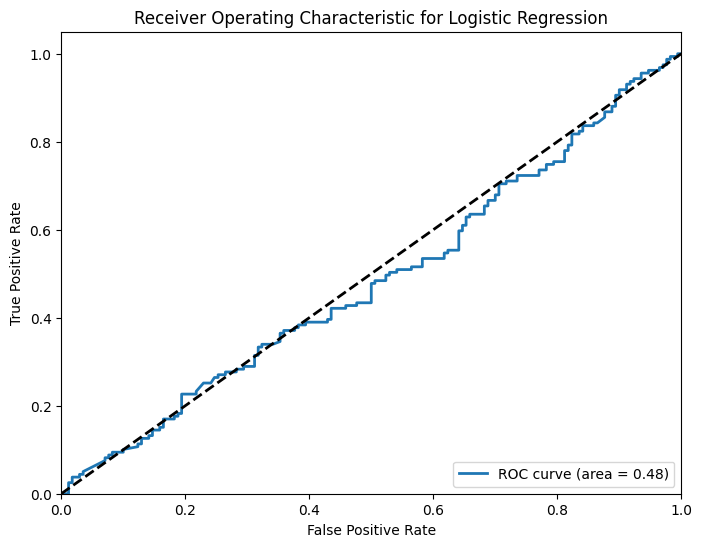

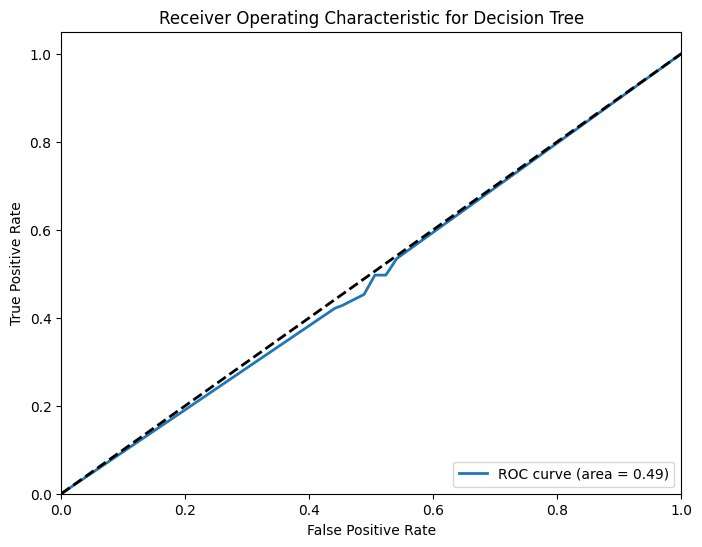

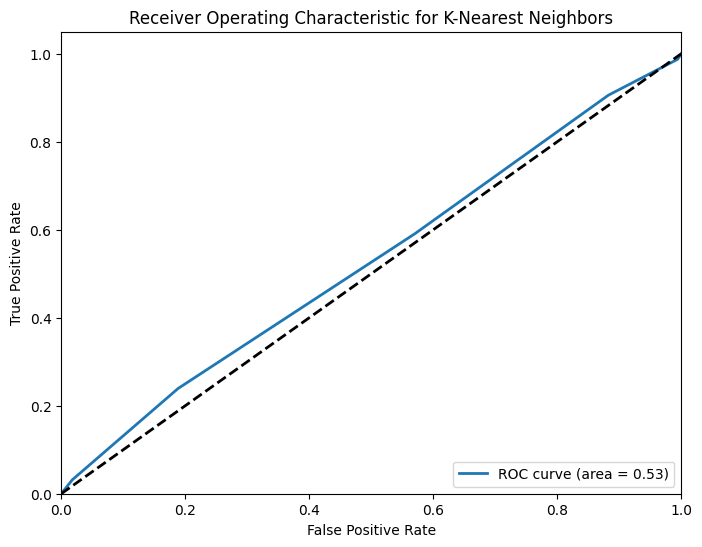

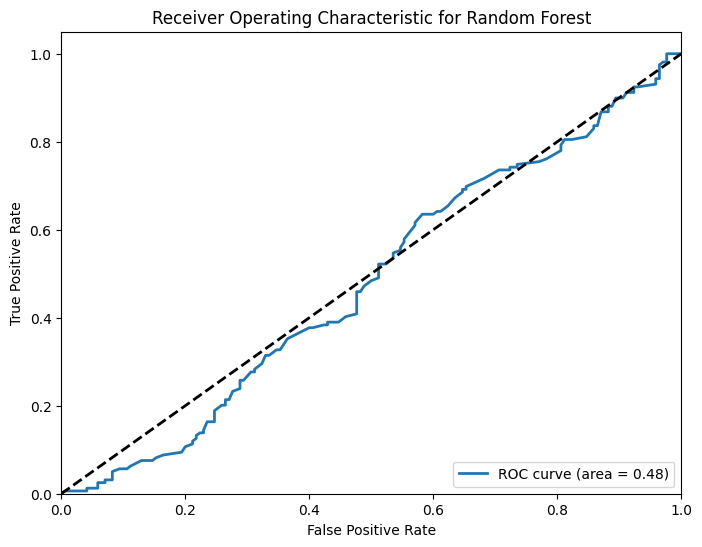

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train, evaluate each model, and plot ROC curves individually
for name, clf in classifiers.items():
    if hasattr(clf, "predict_proba"):  # Check if the classifier supports probability predictions
        # Fit the model and make predictions
        clf.fit(X_train, y_train)
        y_probas = clf.predict_proba(X_test)[:, 1]

        # Calculate ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_probas)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve for the current model
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic for {name}')
        plt.legend(loc="lower right")
        plt.show()


In [23]:
import pandas as pd
from scipy.stats import pearsonr

# Ensure that df['Impact Score'] and df['Outcome'] are appropriately defined and part of your DataFrame
# Dropping rows with NaN values in either 'Impact Score' or 'Outcome'
cleaned_df = df.dropna(subset=['Impact Score', 'Sentiment', 'Outcome'])

# Now calculate the Pearson correlation and p-values
impact_corr, impact_p_value = pearsonr(cleaned_df['Impact Score'], cleaned_df['Outcome'])
sentiment_corr, sentiment_p_value = pearsonr(cleaned_df['Sentiment'], cleaned_df['Outcome'])

print(f"Impact Score and Outcome - Correlation: {impact_corr}, P-value: {impact_p_value}")
print(f"Sentiment and Outcome - Correlation: {sentiment_corr}, P-value: {sentiment_p_value}")


Impact Score and Outcome - Correlation: 0.020808963488424176, P-value: 0.49693530105302774
Sentiment and Outcome - Correlation: -0.02212597241629509, P-value: 0.4700950545632637


Text(0.5, 1.0, 'Sentiment vs. Outcome')

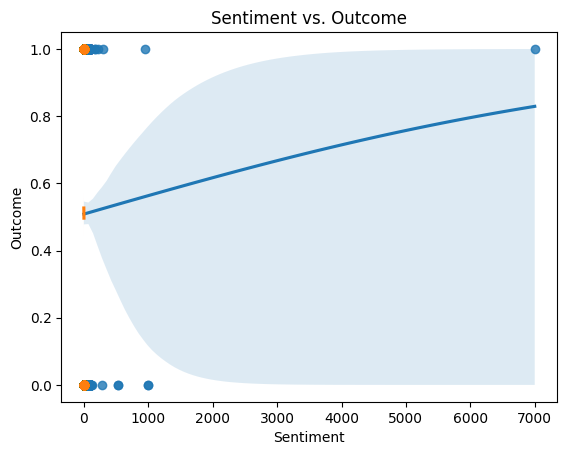

In [24]:
import seaborn as sns

# Scatter plot with a regression line
sns.regplot(x='Impact Score', y='Outcome', data=df, logistic=True).set_title("Impact Score vs. Outcome")
sns.regplot(x='Sentiment', y='Outcome', data=df, logistic=True).set_title("Sentiment vs. Outcome")


In [25]:
# Assuming best_rf is your best-performing RandomForest model after GridSearch
feature_importances = best_rf.feature_importances_
print(f"Feature importances for Impact Score and Sentiment: {feature_importances}")


Feature importances for Impact Score and Sentiment: [0.63602162 0.36397838]


In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER's SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply the analyzer to a sample of the text descriptions
# You can adjust the number of samples as needed
sample_texts = df['Text_description'].sample(n=5, random_state=1)
for text in sample_texts:
    print(f"Text: {text}")
    print(f"Sentiment: {sia.polarity_scores(text)}")

# Now, let's calculate sentiment scores for the entire DataFrame
# and ensure they are within the expected range
df['Sentiment'] = df['Text_description'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Check the range of the sentiment scores
print("Sentiment score range:")
print(f"Min: {df['Sentiment'].min()}, Max: {df['Sentiment'].max()}")

# If any sentiment scores fall outside the range of -1 to 1, there's a problem
if not df['Sentiment'].between(-1, 1).all():
    print("There are sentiment scores outside the expected range of -1 to 1.")
else:
    print("All sentiment scores fall within the expected range of -1 to 1.")


Text: Election of Abiy Ahmed as Prime Minister of Ethiopia in 2018, ushering in political reforms and peace initiatives.
Sentiment: {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5423}
Text: Aimed at achieving Vietnamese independence through political and armed resistance.
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text: Jair Bolsonaro's assumption of the presidency of Brazil in 2019, marked by controversial policies and environmental issues.
Sentiment: {'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'compound': -0.2023}
Text: A 1956 international crisis involving Egypt, Israel, the United Kingdom, and France over control of the Suez Canal, highlighting shifts in global power dynamics and decolonization efforts.
Sentiment: {'neg': 0.128, 'neu': 0.719, 'pos': 0.153, 'compound': -0.0516}
Text: The French national football team won the 2018 FIFA World Cup, bringing pride and celebration to the country.
Sentiment: {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 